# Example Evaluation Code

This notebook will be very __similar__ to the code I use to evaluate your results - it is provided for __your convenience__ so that you can use it to evaluate your preprocessing results at any time before your __final submission__.

Please note that the results here will __NOT__ be the same as my evaluation results.

Let's start with loading the required packages.

In [2]:
# import required package for data handling
import pandas as pd
import numpy as np

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

Next you should load __your__ data. In this case, I am using a sample dataset (`GroupX.csv`) which contains 6 predictors (`X1 - X6`) and two target variables (`Y1, Y2`).

Please make sure you change the data to your __OWN__ dataset when using this code.

__NOTE__:
1. Your dataset maybe very different from the sample dataset.
2. Please follow this structure when submitting your dataset.

In [3]:
#check_this_mean average 10 run y1 61, 65
#check_this_mean_z average 10 run y1 60, average 10 run y2 67
data = pd.read_csv('mean_no_outliers.csv', header=0)
data.head()

,Unnamed: 0,ticker,company_name,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,positive_eps_dummy,...,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words,pre_IPO_price_revision,post_IPO_initial_return
0,0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,10.0,9.5,8.5,11.870000,122.00,1.0,0.60,...,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,0,1
1,1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,8.0,10.0,8.0,7.250000,152.75,0.0,-1.62,...,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,1,0
2,2,ACAD,ACADIA PHARMACEUTICALS INC,7.0,14.0,12.0,6.700000,90.00,1.0,-1.24,...,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,1,0
3,3,ACHN,ACHILLION PHARMACEUTICALS INC,11.5,16.0,14.0,12.390000,209.00,1.0,-0.91,...,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,1,1
4,4,ACLI,AMERICAN COMMERCIAL LINES INC.,21.0,21.0,19.0,21.030001,80.00,1.0,0.07,...,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0,1


Checking your data types and make sure it follows the data dictionary would be an important step, you can do that using the `.dtypes` attribute.

__NOTE__: all __continuous__ faetures will be in `float64` data type, and all __categorical__ features will be in `int64` data type (given you already coded (per __suggest task \#6__ in the competition document) them).

In [4]:
data.dtypes

Unnamed: 0                      int64
ticker                         object
company_name                   object
offer_price                   float64
price_range_higher_bound      float64
price_range_lower_bound       float64
first_day_trading_price       float64
days                          float64
top_tier_dummy                float64
positive_eps_dummy            float64
prior_nasdaq_15day_returns    float64
share_overhang                float64
up_revision                   float64
sales                         float64
number_of_sentences           float64
number_of_words               float64
number_of_real_words          float64
number_of_long_sentences      float64
number_of_long_words          float64
number_of_positive_words      float64
number_of_negative_words      float64
number_of_uncertain_words     float64
pre_IPO_price_revision          int64
post_IPO_initial_return         int64
dtype: object

Now you need to specify your targets and predictors. __NOTE__ we have two targets here (`Y1, Y2`).

In [5]:
y1 = data.pre_IPO_price_revision
y2 = data.post_IPO_initial_return

Check the shape of the data.

In [6]:
data.shape

(682, 24)

It is very possible that you will use different sets of the predictors for `Y1` and `Y2`. Now let's define them.

First, let's define predictors for `Y1` - which will be the first 5 features in `data`.

In [7]:
cols = list(data.columns)
# first 5 features 
cols[:-3]

['Unnamed: 0',
 'ticker',
 'company_name',
 'offer_price',
 'price_range_higher_bound',
 'price_range_lower_bound',
 'first_day_trading_price',
 'days',
 'top_tier_dummy',
 'positive_eps_dummy',
 'prior_nasdaq_15day_returns',
 'share_overhang',
 'up_revision',
 'sales',
 'number_of_sentences',
 'number_of_words',
 'number_of_real_words',
 'number_of_long_sentences',
 'number_of_long_words',
 'number_of_positive_words',
 'number_of_negative_words']

Use below code to select the first 5 features as predictors for `Y1`.

In [8]:
predictors_y1 = data[cols[:-3]].drop(['Unnamed: 0','ticker','company_name','price_range_higher_bound','price_range_lower_bound','offer_price','first_day_trading_price','top_tier_dummy'],1)
predictors_y1.head()

,days,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words
0,122.00,0.60,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0
1,152.75,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0
2,90.00,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0
3,209.00,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0
4,80.00,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0


Upon investigation of the data, we know we have __six__ features (`X1 - X6`) predicting `Y2`. Use similar code (as below) to select them.

In [9]:
predictors_y2 = data[cols[:-2]].drop(['Unnamed: 0','ticker','company_name','price_range_higher_bound','price_range_lower_bound','first_day_trading_price','offer_price','top_tier_dummy'],1)
predictors_y2.head()

,days,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words
0,122.00,0.60,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,152.75,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,90.00,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,209.00,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,80.00,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


Below is the key part of this notebook - which generates a `logistic regression` model to predict `Y1`/`Y2`.

The code works this way:

1. We generate two lists `f1_score_lst` and `auc_lst` to store f1_score and AUC from each of the `10` runs of the model;
2. Define model:
    1. We define a `LogisticRegression()` model;
    
    2. We split predictors (`predictors_y1`) and target `y1` to training (80%) and testing (20%);
    
    3. We fit the model `clf` to the training data, then use it to predict on the testing data;
    
    4. We also defined a `10-fold cross validation` to make sure our model do not overfit - see [here](https://scikit-learn.org/stable/modules/cross_validation.html) for more info;
    
    5. We append the f1_score and AUC of current model to the lists (`f1_score_lst` and `auc_lst`) we defined earlier.
  
3. Print out average f1_score and AUC for all 10 runs;
4. Print out average average accuracy from cross validation
5. Print out confusion matrix and classification report for the __last__ model.

__NOTE__: Step 3 provides the evaluation results we need; step 4 - 5 can be used to verify the results from step 3.

In [10]:
# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []


#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,10):
    #Model building
    clf = LogisticRegression()
    X1_train, X1_test, y1_train, y1_test = train_test_split(predictors_y1, y1, test_size=0.2, random_state=123)
    clf.fit(X1_train, y1_train)

    y1_pred = clf.predict(X1_test)

    
    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(clf, X1_train, y1_train, cv=kfold, scoring=scoring)

    

    
    #calculate f1-score and AUC
    
    clf_roc_auc = roc_auc_score(y1_test, y1_pred)
    f1_score_lst.append(precision_recall_fscore_support(y1_test, y1_pred, average='weighted')[2])
    auc_lst.append(clf_roc_auc)


print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

#result=logit_model.fit()
confusion_matrix_y1 = confusion_matrix(y1_test, y1_pred)


#print(result.summary())
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(X1_test, y1_test)))

print("10-fold cross validation average accuracy of classifier: %.3f" % (results.mean()))

print('Confusion Matrix for Logistic Regression Classfier:')
print(confusion_matrix_y1)

print('Classification Report for Logistic Regression Classfier:')
print(classification_report(y1_test, y1_pred))


F1 0.5149; AUC 0.5179 
Accuracy of classifier on test set: 0.53
10-fold cross validation average accuracy of classifier: 0.541
Confusion Matrix for Logistic Regression Classfier:
[[24 41]
 [24 48]]
Classification Report for Logistic Regression Classfier:
             precision    recall  f1-score   support

          0       0.50      0.37      0.42        65
          1       0.54      0.67      0.60        72

avg / total       0.52      0.53      0.51       137



Below code are used to evaluate model toward `Y2`. It is very similar to the code above - key difference is that `Y2` is imbalanced - so I wrote some code (under `# Begin oversampling`) to deal with that.

In [11]:
# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []


#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,10):
    #Model building
    clf1 = LogisticRegression()
    
    # Splitting data into testing and training
    X2_train, X2_test, y2_train, y2_test = train_test_split(predictors_y2, y2, test_size=0.2, random_state=123)
    
    # Begin oversampling
    oversample = pd.concat([X2_train,y2_train],axis=1)
    max_size = oversample['post_IPO_initial_return'].value_counts().max()
    lst = [oversample]
    for class_index, group in oversample.groupby('post_IPO_initial_return'):
        lst.append(group.sample(max_size-len(group), replace=True))
    X2_train = pd.concat(lst)
    y2_train=pd.DataFrame.copy(X2_train['post_IPO_initial_return'])
    del X2_train['post_IPO_initial_return']
    # fitting model on oversampled data
    clf1.fit(X2_train, y2_train)
    
    y2_pred = clf1.predict(X2_test)
    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(clf1, X2_train, y2_train, cv=kfold, scoring=scoring)
    
    #calculate f1-score and AUC
    clf1_roc_auc = roc_auc_score(y2_test, y2_pred)
    
    
    #calculate average f1-score and AUC
    f1_score_lst.append(precision_recall_fscore_support(y2_test, y2_pred, average='weighted')[2])
    auc_lst.append(clf1_roc_auc)
    
    
print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

confusion_matrix_y2 = confusion_matrix(y2_test, y2_pred)


print('Accuracy of classifier on test set: {:.3f}'.format(clf1.score(X2_test, y2_test)))

print("10-fold cross validation average accuracy of clf1: %.3f" % (results.mean()))

print('Confusion Matrix for Classfier:')
print(confusion_matrix_y2)

print('Classification Report for Classfier:')
print(classification_report(y2_test, y2_pred))


F1 0.4511; AUC 0.4724 
Accuracy of classifier on test set: 0.445
10-fold cross validation average accuracy of clf1: 0.371
Confusion Matrix for Classfier:
[[26 16]
 [60 35]]
Classification Report for Classfier:
             precision    recall  f1-score   support

          0       0.30      0.62      0.41        42
          1       0.69      0.37      0.48        95

avg / total       0.57      0.45      0.46       137



### TESTING ###

In [12]:
list_of_files = ['check_this_mean_z','check_this_median_z','mean','mean_no_outliers','mean_no_outliers_no_skewness','mean_no_outliers_no_skewness_z_score','median_no_outliers_no_skewness_z_score_scaled_one_hot.csv','mean_no_outliers_no_skewness_z_score_scaled_one_hot.csv','mean_no_outliers','mean_no_outliers_no_skewness_z_score_scaled','median','median_no_outliers','median_no_outliers_no_skewness','median_no_outliers_no_skewness_z_score','median_no_outliers_no_skewness_z_score_scaled']
y1_dict={}
y2_dict={}
for file in list_of_files:
    data = pd.read_csv('{}.csv'.format(file), header=0)
    y1 = data.pre_IPO_price_revision
    y2 = data.post_IPO_initial_return
    cols = list(data.columns)
    cols[:-3]
    predictors_y1 = data[cols[:-3]].drop(['Unnamed: 0','ticker','company_name','price_range_higher_bound','price_range_lower_bound','offer_price','first_day_trading_price','top_tier_dummy'],1)
    predictors_y2 = data[cols[:-2]].drop(['Unnamed: 0','ticker','company_name','price_range_higher_bound','price_range_lower_bound','first_day_trading_price','offer_price','top_tier_dummy'],1)


    from xgboost import XGBClassifier
    scores1 = []
    scores2 = []
    count=0
    for i in range(0,10):
        X1_train, X1_test, y1_train, y1_test = train_test_split(predictors_y1, y1, test_size=0.2, random_state=i)
        X2_train, X2_test, y2_train, y2_test = train_test_split(predictors_y2, y2, test_size=0.2, random_state=i)
        model1 = XGBClassifier(learning_rate = 0.1,
                          n_estimators=1000,
                          max_depth=10,
                          min_child_weight=1,
                          gamma=0.5,
                          reg_alpha=0.05,
                          colsample_bytree=0.8,
                          objective='binary:logistic',
                          scal_pos_weight=1,
                          seed=27)
        model2 = XGBClassifier(learning_rate = 0.1,
                          n_estimators=1000,
                          max_depth=10,
                          min_child_weight=1,
                          gamma=0,
                          reg_alpha=0,
                          colsample_bytree=1.0,
                          objective='binary:logistic',
                          scal_pos_weight=1,
                          seed=27)

        model1.fit(X1_train,y1_train)
        model2.fit(X2_train,y2_train)

        y_pred1 = model1.predict(X1_test)
        y_pred2 = model2.predict(X2_test)

        accuracy1 = accuracy_score(y1_test, y_pred1)
        accuracy2 = accuracy_score(y2_test, y_pred2)
        scores1.append(accuracy1)
        scores2.append(accuracy2)
        #print(count)
        count = count + 1

    import numpy as np
    y1_dict.update({file:np.mean(scores1)})
    y2_dict.update({file:np.mean(scores2)})
    #print('Accuracy y1 for file {}: is {}'.format(file,np.mean(scores1)))
    #print('Accuracy y2 for file {}: is {}'.format(file,np.mean(scores2)))

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\prepro

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\prepro

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\prepro

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\prepro

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\prepro

FileNotFoundError: File b'median_no_outliers_no_skewness_z_score_scaled_one_hot.csv.csv' does not exist

In [13]:
y1_dict

{'check_this_mean_z': 0.6065693430656934,
 'check_this_median_z': 0.5963503649635037,
 'mean': 0.6328467153284671,
 'mean_no_outliers': 0.6065693430656934,
 'mean_no_outliers_no_skewness': 0.6109489051094891,
 'mean_no_outliers_no_skewness_z_score': 0.6328467153284671}

In [14]:
y2_dict

{'check_this_mean_z': 0.6510948905109489,
 'check_this_median_z': 0.645985401459854,
 'mean': 0.6751824817518248,
 'mean_no_outliers': 0.6510948905109489,
 'mean_no_outliers_no_skewness': 0.6510948905109489,
 'mean_no_outliers_no_skewness_z_score': 0.6751824817518248}

(<matplotlib.axes._subplots.AxesSubplot at 0x28a1056b390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28a105d2cf8>)

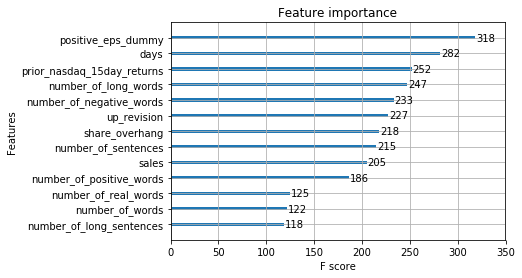

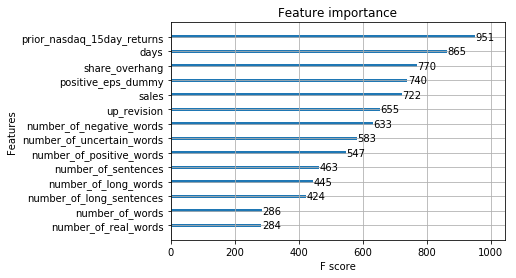

In [16]:
#print('model 1 best_performance: colsample_bytree:1.0,gamma:0.5,max_depth=10,min_child_weight=1,reg_alpha=0.05')
#print('model 2 best_performance: colsample_bytree:1.0,gamma:0,max_depth=10,min_child_weight=1,reg_alpha=0')
from xgboost import plot_importance
plot_importance(model1), plot_importance(model2)

In [18]:
from sklearn.grid_search import GridSearchCV
#param_test1 = {
#               'max_depth':[3,7,10],
#               'min_child_weight':[1,3,6],
#               'gamma':[0,0.5,1.0],
#               'colsample_bytree':[0,0.5,1.0],
#               'reg_alpha':[0,0.005,0.01,0.05]
#              }
param_test1 = {'max_depth':[10],'min_child_weight':[1],'reg_alpha':[0.05],'gamma':[0.5],'colsample_bytree':[1]}
gsearch1 = GridSearchCV(estimator = model1,param_grid = param_test1,scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gsearch1.fit(X1_train,y1_train)
gsearch1.grid_scores_,gsearch1.best_params_,gsearch1.best_score_

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


([mean: 0.62292, std: 0.03279, params: {'colsample_bytree': 1, 'gamma': 0.5, 'max_depth': 10, 'min_child_weight': 1, 'reg_alpha': 0.05}],
 {'colsample_bytree': 1,
  'gamma': 0.5,
  'max_depth': 10,
  'min_child_weight': 1,
  'reg_alpha': 0.05},
 0.6229245541838135)

In [19]:
from sklearn.grid_search import GridSearchCV
#param_test2 = {
#               'max_depth':[3,7,10],
#               'min_child_weight':[1,3,6],
#               'gamma':[0,0.5,1.0],
#               'colsample_bytree':[0,0.5,1.0],
#               'reg_alpha':[0,0.005,0.01,0.05]
#              }
param_test2= {'max_depth':[10], 'min_child_weight':[1],'reg_alpha':[.2],'gamma':[0],'colsample_bytree':[1]}
gsearch2 = GridSearchCV(estimator = model2,param_grid = param_test2,scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gsearch2.fit(X2_train,y2_train)
gsearch2.grid_scores_,gsearch2.best_params_,gsearch2.best_score_

([mean: 0.55263, std: 0.05373, params: {'colsample_bytree': 1, 'gamma': 0, 'max_depth': 10, 'min_child_weight': 1, 'reg_alpha': 0.2}],
 {'colsample_bytree': 1,
  'gamma': 0,
  'max_depth': 10,
  'min_child_weight': 1,
  'reg_alpha': 0.2},
 0.5526315789473685)